In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.deterministic import DeterministicProcess
plt.style.use("seaborn-whitegrid")

In [5]:
plt

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 5),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('spy.csv')

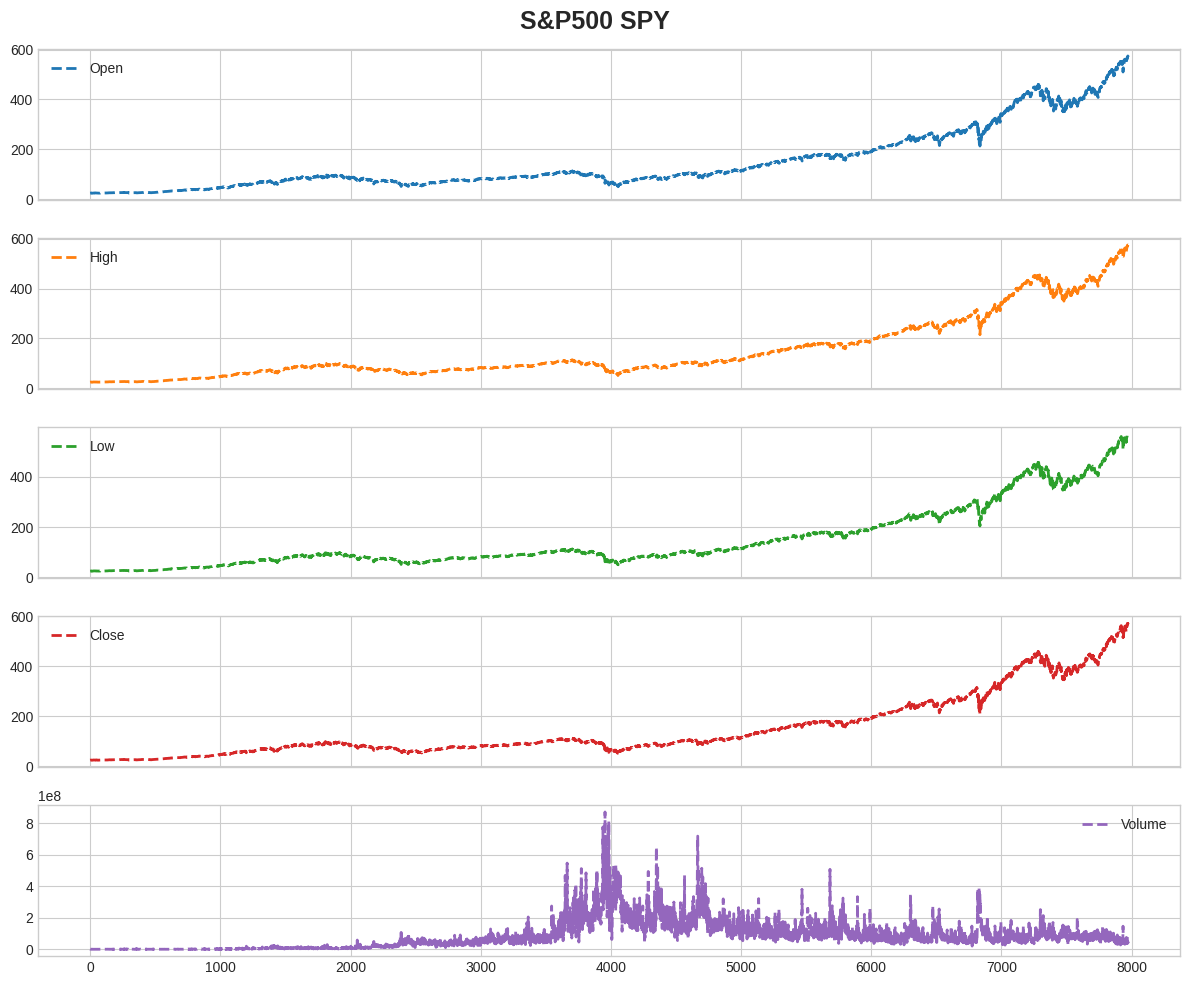

In [9]:
features = ['Open','High','Low','Close','Volume']
df[features].plot(subplots=True,figsize=(12,10),title='S&P500 SPY',linestyle='--',linewidth=2)
plt.show()

<Axes: xlabel='Year'>

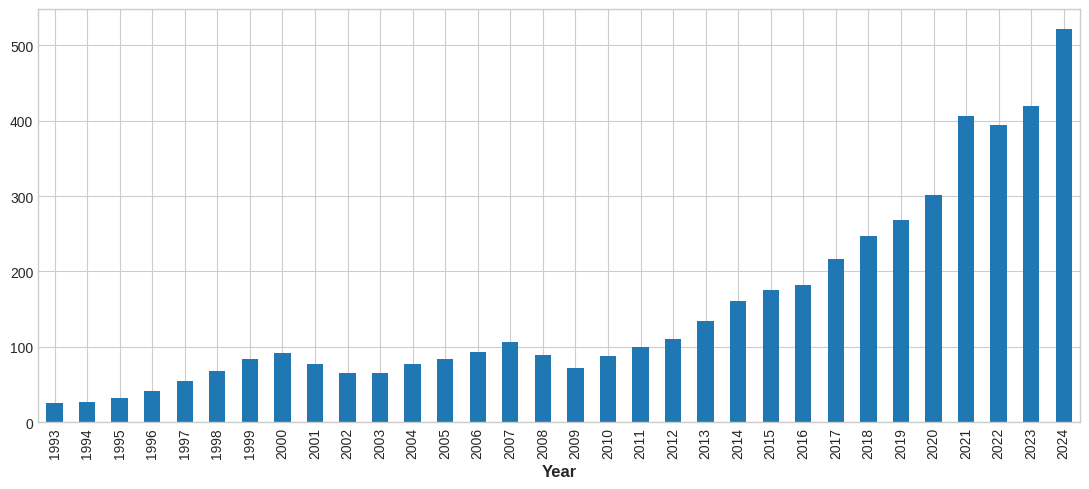

In [10]:
df.groupby('Year')['Close'].mean().plot(kind = 'bar')

In [12]:
year['Time'] = np.arange(len(year.index))

Text(0.5, 1.0, 'Time plot of SPY Closing Price during 2022')

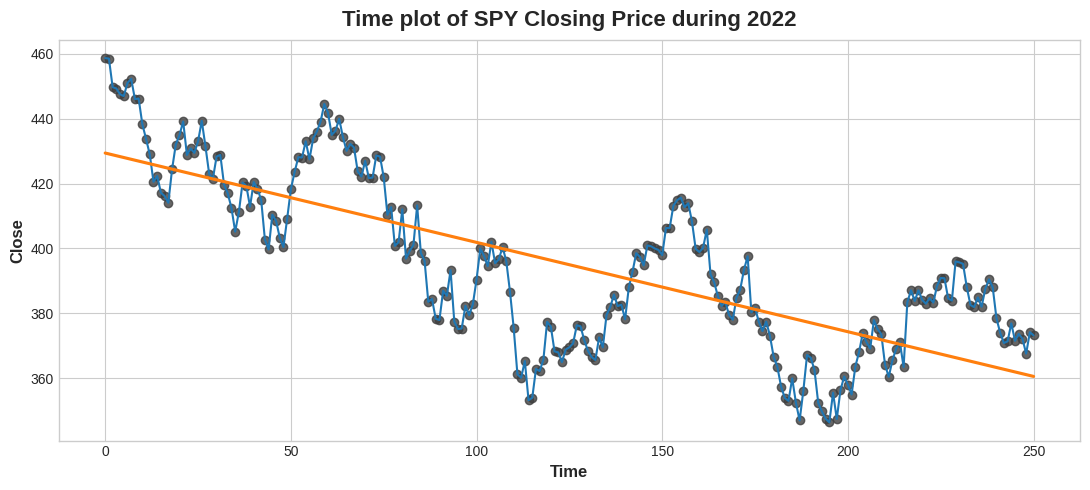

In [13]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=year)
ax = sns.regplot(x='Time', y='Close', data=year, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of SPY Closing Price during 2022')

In [14]:
print("Price at the beginning of the year:" , year.Close[7285].round(2))
print("Price at the end of the year:" , year.Close[7535].round(2))
print("Price drop:", (year.Close[7285] - year.Close[7535]).round(2))

Price at the beginning of the year: 458.72
Price at the end of the year: 373.19
Price drop: 85.53


In [15]:
# prepare X and y
y = df['Close']
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()

In [16]:
# fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
# make predictions
y_pred = pd.Series(model.predict(X), index=X.index)


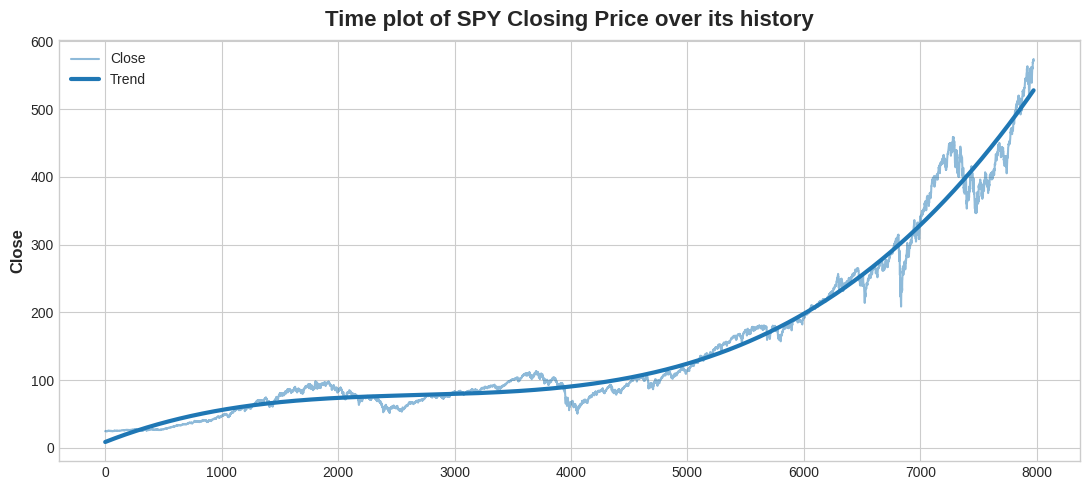

In [18]:
# plot the predictions against actual values
ax = y.plot(alpha=0.5, title="Time plot of SPY Closing Price over its history", ylabel="Close")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend()

In [19]:
# model accuracy
model.score(X,y)

0.9779218506332193

In [20]:
# calculate mean absolute error and mean_absolute_percentage_error
print('Mean Absolute Error =', mean_absolute_error(y, y_pred).round(2))
print('Mean Absolute Percentage Error = ', mean_absolute_percentage_error(y, y_pred).round(2))

Mean Absolute Error = 13.29
Mean Absolute Percentage Error =  0.13


In [21]:
df.Close.tail(1)

,Close
7973,573.76001


In [22]:
y_pred.tail(1).round(2)

,0
7973,527.64
